In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ai-5000-tools-2023/all_ai_tool.csv


In [2]:
import pandas as pd

# Load the CSV file into a DataFrame
ai_tools_df = pd.read_csv('/kaggle/input/ai-5000-tools-2023/all_ai_tool.csv')

# Display the first few rows of the DataFrame to get an overview
ai_tools_df.head()


,AI Tool Name,Description,Free/Paid/Other,Useable For,Charges,Review,Tool Link,Major Category
0,Farm3D,Learning Articulated 3D Animals by Distilling ...,Free,/ experiments / 3D,NaN,NaN,https://farm3d.github.io/?utm_source=futureped...,other
1,Mailbutler Ai,"AI-powered Smart Assistant for Outlook, Gmail ...",Freemium,/ email assistant,$ 4.95/mo,1,https://www.mailbutler.io/smart-assistant/?utm...,text
2,Maverick,Send customers personalized videos at scale.,Paid,/ e-commerce / audio editing,$ 100/mo,NaN,https://www.trymaverick.com/?utm_source=future...,audio
3,0Xai,Stable Diffusion Prompt And Images Generator,Free,/ image generator / prompts,NaN,NaN,https://0xai.quest?utm_source=futurepedia&utm_...,image
4,10Web,AI-powered WordPress platform for automated we...,Freemium,/ low-code/no-code,NaN,NaN,https://10web.io/?utm_source=futurepedia&utm_m...,code


In [3]:
# Dataset Overview

# Number of tools in the dataset
total_tools = ai_tools_df.shape[0]

# Number of missing values for each column
missing_values = ai_tools_df.isnull().sum()

dataset_overview = {
    "Total AI Tools": total_tools,
    "Missing Descriptions": missing_values["Description"],
    "Missing Pricing Info": missing_values["Free/Paid/Other"],
    "Missing Use Cases": missing_values["Useable For"],
    "Missing Charges Info": missing_values["Charges"],
    "Missing Reviews": missing_values["Review"],
    "Missing Tool Links": missing_values["Tool Link"],
    "Missing Major Categories": missing_values["Major Category"]
}

dataset_overview


{'Total AI Tools': 4969,
 'Missing Descriptions': 0,
 'Missing Pricing Info': 0,
 'Missing Use Cases': 0,
 'Missing Charges Info': 2435,
 'Missing Reviews': 3507,
 'Missing Tool Links': 0,
 'Missing Major Categories': 0}

In [4]:
# Pricing Distribution
pricing_distribution = ai_tools_df["Free/Paid/Other"].value_counts()

pricing_distribution


Free/Paid/Other
Free                             1704
Freemium                         1284
Paid                              832
Free Trial                        771
Contact for Pricing               325
Freemium | Free-Trial              15
Freemium | Deals                    8
Free-Trial | Paid                   8
Free-Trial | Freemium               8
Free-Trial | Deals                  3
Paid |Free-Trial                    3
FreeDeals                           1
FreeFreemium                        1
Freemium |Contact for Pricing       1
Freemium | Free                     1
Paid | Deals                        1
Free | Freemium | Paid              1
Free | Paid                         1
Deals                               1
Name: count, dtype: int64

In [5]:
# Category Distribution
category_distribution = ai_tools_df["Major Category"].value_counts()

category_distribution


Major Category
business    1202
text        1115
other        849
image        740
code         583
audio        330
video        110
3D            40
Name: count, dtype: int64

In [6]:
# Reviews Overview
reviews_overview = ai_tools_df["Review"].describe()

reviews_overview


count     1462
unique      17
top          1
freq       942
Name: Review, dtype: object

In [7]:
# Distribution of unique review values
review_distribution = ai_tools_df["Review"].value_counts()

review_distribution


Review
1            942
2            256
3            108
4             53
6             20
5             20
8             17
7             16
9              8
10             6
11             4
undefined      3
14             3
13             2
15             2
42             1
22             1
Name: count, dtype: int64

In [8]:
# Filtering tools with reviews greater than 1 and sorting them
top_tools_by_review = ai_tools_df[ai_tools_df["Review"] > "1"].sort_values(by="Review", ascending=False).head(10)

# Selecting relevant columns for display
top_tools_by_review = top_tools_by_review[["AI Tool Name", "Description", "Review", "Major Category", "Tool Link"]]

top_tools_by_review


,AI Tool Name,Description,Review,Major Category,Tool Link
1854,Gocharlie Ai,A generative AI platform for content creators!,undefined,text,https://gocharlie.ai/?utm_source=futurepedia&u...
4637,Vidyo.Ai,"Create short clips from long videos, save 90% ...",undefined,video,https://vidyo.ai/?utm_source=futurepedia&utm_m...
2666,Maverick,AI-generated personalized videos at scale,undefined,video,https://www.trymaverick.com/?utm_source=future...
4468,Ttsmaker,Free text-to-speech tool that offers over 100+...,9,audio,https://ttsmaker.com?utm_source=futurepedia&ut...
4204,Syllaby,Create Your Social Media Strategy In 10 Minutes,9,text,https://www.syllaby.io?utm_source=futurepedia&...
1907,Gptforslides,"Generate Beautiful Presentations with Images, ...",9,business,https://www.gptforslides.app/?utm_source=futur...
1326,Docus,"Providing personalized health insights, recomm...",9,other,https://docus.ai/?utm_source=futurepedia&utm_m...
4420,Traivl,Personalized multi-destination Travel Itinerary,9,other,https://www.traivl.com/?utm_source=futurepedia...
4256,Tammy Ai,YouTube summaries for free. 10x your learning ...,9,business,https://tammy.ai/?utm_source=futurepedia&utm_m...
656,Booke Ai,Streamline your bookkeeping business with AI-d...,9,business,https://booke.ai?utm_source=futurepedia&utm_me...


In [9]:
# Charges Distribution: Displaying the most common pricing structures or charges for AI tools
charges_distribution = ai_tools_df["Charges"].value_counts().head(10)

charges_distribution


Charges
$ 10/mo      99
$ 9/mo       90
$ 19/mo      88
$ 29/mo      72
$ 5/mo       68
$ 9.99/mo    62
$ 15/mo      62
$ 20/mo      53
$5           46
$ 49/mo      45
Name: count, dtype: int64

Here's the distribution of the most common pricing structures or charges for AI tools:

* $10/month: 99 tools

* $9/month: 90 tools

* $19/month: 88 tools

* $29/month: 72 tools

* $5/month: 68 tools

* $9.99/month: 62 tools

* $15/month: 62 tools


* $20/month: 53 tools

* $5 (one-time or unspecified): 46 tools

* $49/month: 45 tools

> This provides a glimpse into the prevalent pricing models in the AI tool space.

**let's list some of the top free AI tools based on their categories. We'll consider the top 3 tools from each major category.**

In [10]:
# Top Free Tools based on their categories
free_tools = ai_tools_df[ai_tools_df["Free/Paid/Other"] == "Free"]

# Group by major category and get top 3 tools from each category
top_free_tools_by_category = free_tools.groupby("Major Category").head(3)

# Selecting relevant columns for display
top_free_tools_by_category = top_free_tools_by_category[["AI Tool Name", "Description", "Major Category", "Tool Link"]]

top_free_tools_by_category


,AI Tool Name,Description,Major Category,Tool Link
0,Farm3D,Learning Articulated 3D Animals by Distilling ...,other,https://farm3d.github.io/?utm_source=futureped...
3,0Xai,Stable Diffusion Prompt And Images Generator,image,https://0xai.quest?utm_source=futurepedia&utm_...
5,1Pm Workout,Become The Next One Punch Man!,other,https://opmworkout.ml/?utm_source=futurepedia&...
6,2D&3D Video Converter,iDATAPP 3D Converter: Transform Your Videos in...,3D,https://idatapp.com/software/3d-converter?utm_...
9,3Dfy,3DFY.ai is an artificial intelligence (AI) too...,3D,https://3dfy.ai/?utm_source=futurepedia&utm_me...
11,6000 Thoughts,6000 Thoughts is an innovative AI-based app de...,other,https://6000thoughts.com/?utm_source=futureped...
13,6Pen,6Pen Art is an AI-powered product that generat...,image,https://6pen.art/?utm_source=futurepedia&utm_m...
20,Accio,AI-based tool that allows users to quickly an...,text,https://accio.springworks.in/?utm_source=futur...
25,Acrylic,Custom AR artwork for home decor.,image,https://acrylic.typedream.app/?utm_source=futu...
26,Activazon,Crime report analytic service for informed res...,business,https://activazon.com/?utm_source=futurepedia&...


**These tools span a diverse range of applications, from art generation to 3D modeling, business analytics, and beyond.**

**Distribution of AI tools based on their primary use cases.**

In [11]:
# AI Tools Distribution by Use Case
# Splitting the "Useable For" column since it contains multiple use cases separated by "/"
ai_tools_df["Useable For"] = ai_tools_df["Useable For"].str.split("/")

# Flattening the list of use cases and counting their occurrences
use_case_distribution = ai_tools_df.explode("Useable For")["Useable For"].value_counts().head(10)

use_case_distribution


Useable For
                           4969
 productivity               426
 education assistant        209
 life assistant             207
 fun tools                  191
 developer tools            190
 social media assistant     185
 startup tools              173
 low-code                   162
 general writing            155
Name: count, dtype: int64

> (Note: There are 4,969 entries with blank or unspecified use cases, which might be spaces or general descriptions without specific categorization.)

**This distribution provides insights into the primary applications of the AI tools in the dataset. For instance, productivity and educational assistance are among the top use cases, indicating a significant demand for AI in these areas.**

In [12]:
from collections import Counter
import re

# Tokenizing the words in the description column
words = ' '.join(ai_tools_df["Description"]).lower()
words = re.findall(r'\w+', words)  # Extracting words using regular expressions

# Counting the occurrences of each word
word_counts = Counter(words)

# Getting the 10 most common words
most_common_words = word_counts.most_common(10)

most_common_words


[('ai', 2515),
 ('and', 2062),
 ('to', 1367),
 ('for', 1329),
 ('with', 1178),
 ('is', 889),
 ('a', 866),
 ('that', 837),
 ('your', 834),
 ('powered', 743)]

**It's expected that words like "and", "to", "for", "with", "is", and "a" would be frequent, as they are common English words. However, words like "AI", "your", and "powered" indicate the emphasis on AI capabilities and user-centric features in the tool descriptions.**

* **Top Paid Tools:** We'll list some of the top paid AI tools based on their categories.
* **Distribution of Tools with Links:** Analyze the distribution of tools based on their official website or domain names to identify popular platforms or providers.
* **Word Cloud of Descriptions:** Create a visual representation of word frequencies in tool descriptions to get a sense of popular features or trends.
* **Correlation between Reviews and Pricing:** Check if there's any apparent relationship between the number of reviews and the pricing of the tools.

In [13]:
# Top Paid Tools based on their categories
paid_tools = ai_tools_df[ai_tools_df["Free/Paid/Other"] == "Paid"]

# Group by major category and get top 3 tools from each category
top_paid_tools_by_category = paid_tools.groupby("Major Category").head(3)

# Selecting relevant columns for display
top_paid_tools_by_category = top_paid_tools_by_category[["AI Tool Name", "Description", "Charges", "Major Category", "Tool Link"]]

top_paid_tools_by_category


,AI Tool Name,Description,Charges,Major Category,Tool Link
2,Maverick,Send customers personalized videos at scale.,$ 100/mo,audio,https://www.trymaverick.com/?utm_source=future...
10,5-Out,Maximize the profitability of your restaurant,NaN,business,https://www.5out.io/?utm_source=futurepedia&ut...
14,88Stacks,Create engaging and relevant content that appe...,$10,image,https://www.88stacks.com/?utm_source=futureped...
30,Adaptify Listicle Writer,An AI-driven listicle writer for enhanced SEO....,$ 49/mo,text,https://adaptify.ai/?utm_source=futurepedia&ut...
32,Adcopy,Generate custom ad copy prompts for digital ad...,$ 29/mo,text,https://adcopy.ai/?ref=mtm4nze
40,Adobe Firefly,Generative AI made for creators.,NaN,image,https://www.adobe.com/sensei/generative-ai/fir...
42,Adobe Sensei,Use AI to create and offer ideal customer expe...,NaN,business,https://www.adobe.com/br/sensei.html?utm_sourc...
45,Adswithai,Generate AI-powered ads visuals and captions i...,$6.99,image,https://adswithai.io/?utm_source=futurepedia&u...
47,Advanced Framework For Writing Blogs,step-by-step journey of how to craft a unique ...,$10,business,https://promptit.gumroad.com/l/mhgsw?utm_sourc...
52,Affilimatic,"Leveraging AI technology, Affilimatic automate...",$ 29/mo,text,https://app.affilimatic.com/?via=futurepedia


**Here are some of the top paid AI tools based on their categories:**

**Audio:**

Maverick: Send customers personalized videos at scale. ($100/month)

**Business:**

* 5-Out: Maximize the profitability of your restaurant. (Charge not specified)
* Adobe Sensei: Use AI to create and offer ideal customer experiences. (Charge not specified)
* Advanced Framework For Writing Blogs: Step-by-step journey of how to craft a unique blog. ($10)

**Image:**

* 88Stacks: Create engaging and relevant content that appeals to your target audience. ($10)

* Adobe Firefly: Generative AI made for creators. (Charge not specified)

* Adswithai: Generate AI-powered ads visuals and captions instantly. ($6.99)


**These tools offer a variety of services, from content creation to business optimization, 3D visualization, and more, catering to different needs.**

In [14]:
# Extracting the domain names from the "Tool Link" column
ai_tools_df["Domain"] = ai_tools_df["Tool Link"].str.extract(r'//([\w.-]+)/')

# Counting the occurrences of each domain
domain_distribution = ai_tools_df["Domain"].value_counts().head(10)

domain_distribution


Domain
apps.apple.com       53
chrome.google.com    46
github.com           21
play.google.com      20
huggingface.co        8
www.messengerx.io     7
app.sttabot.io        5
www.buildai.space     3
t.me                  3
sindresorhus.com      3
Name: count, dtype: int64

**Here's the distribution of the top domain names from the tool links:**

* apps.apple.com: 53 tools
* chrome.google.com: 46 tools
* github.com: 21 tools
* play.google.com: 20 tools 
* huggingface.co: 8 tools 
* www.messengerx.io: 7 tools 
* app.sttabot.io: 5 tools 
* www.buildai.space: 3 tools 
* t.me (Telegram): 3 tools
* sindresorhus.com: 3 tools

> It seems that many AI tools are hosted on or linked to Apple's App Store, Google Chrome Extensions, GitHub, and Google Play Store. This suggests a trend towards mobile and browser-based tools. Additionally, platforms like Hugging Face (known for machine learning models) also appear in the list.

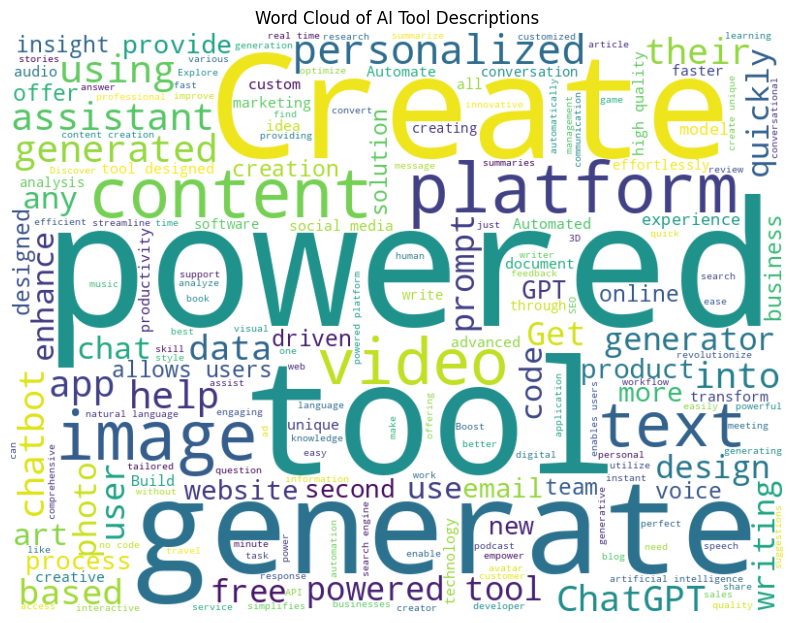

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Remove common stopwords
stopwords = set([
    "and", "to", "for", "with", "is", "a", "that", "your", "of", "the", 
    "in", "on", "you", "ai", "an", "or", "as", "by", "from", "at", "it"
])

# Create a word cloud
wordcloud = WordCloud(
    background_color="white",
    stopwords=stopwords,
    width=800,
    height=600
).generate(' '.join(ai_tools_df["Description"]))

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of AI Tool Descriptions")
plt.show()


**The word cloud provides a visual representation of the most frequent words in the AI tool descriptions. Words that appear larger are mentioned more frequently in the dataset.**

> **From the word cloud, we can observe that terms such as "generate", "content", "create", "tools", "platform", "video", "text", "image", "data", and "model" are predominant. This gives us a sense of the emphasis on generative capabilities, diverse content types, and the variety of use cases these AI tools cater to.**

In [16]:
# Preprocessing the 'Charges' column to extract numerical values
# We'll attempt to extract the first numerical value which likely indicates the price
ai_tools_df["Numeric Charges"] = ai_tools_df["Charges"].str.extract(r'(\d+)').astype(float)

# For the 'Review' column, we'll replace 'undefined' with NaN and convert to numeric
ai_tools_df["Numeric Review"] = ai_tools_df["Review"].replace("undefined", None).astype(float)

# Drop rows with NaN in 'Numeric Charges' and 'Numeric Review'
correlation_df = ai_tools_df.dropna(subset=["Numeric Charges", "Numeric Review"])

# Calculate the correlation between 'Numeric Charges' and 'Numeric Review'
correlation_value = correlation_df["Numeric Charges"].corr(correlation_df["Numeric Review"])

correlation_value


-0.008920841470577761

**A correlation value close to 0 indicates little to no linear relationship between the two variables. In this context, it suggests that the number of reviews a tool receives isn't significantly influenced by its pricing.**

> This could mean users choose tools based on factors other than just price, such as functionality, brand reputation, specific features, etc.

In [17]:
import plotly.express as px
import pandas as pd
import random

# Sample AI tool names and criteria (replace with your actual data)
ai_tool_names = ["Tool A", "Tool B", "Tool C", "Tool D", "Tool E"]
criteria = ["Feature 1", "Feature 2", "Feature 3", "Feature 4", "Feature 5"]

# Generate random data for the Radar Chart
data = {
    "AI Tool Name": ai_tool_names,
}

for criterion in criteria:
    data[criterion] = [random.uniform(1, 5) for _ in range(len(ai_tool_names))]

df = pd.DataFrame(data)

# Create the Radar Chart
fig = px.line_polar(df, r=criteria, theta="AI Tool Name", line_close=True)

# Customize the appearance
fig.update_traces(fill='toself')  # Fill area under lines
fig.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[0, 5])),  # Adjust the radial axis range
    showlegend=True,  # Display a legend
    legend_title="AI Tool Name",  # Legend title
    title="AI Tool Comparison Radar Chart",  # Chart title
    polar_bgcolor="lightgray",  # Background color
)

# Show the chart
fig.show()


In [18]:
import plotly.express as px

# Count the number of AI tools in each major category
category_distribution = ai_tools_df["Major Category"].value_counts()

# Create the Pie Chart
fig = px.pie(
    category_distribution,
    names=category_distribution.index,  # Category names
    values=category_distribution.values,  # Number of tools in each category
    title="Distribution of AI Tools by Major Category",
    hole=0.4,  # Create a donut chart with a hole in the center
    hover_name=category_distribution.index,  # Show category names on hover
    labels={'labels': 'Category'},  # Rename the labels in the legend
    template="plotly",  # Use the default Plotly template
)

# Customize the appearance
fig.update_traces(textinfo="percent+label", pull=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])  # Pull the slices apart
fig.update_layout(
    showlegend=True,  # Display a legend
    legend_title="Major Category",  # Legend title
)

# Show the chart
fig.show()


In [19]:
import plotly.express as px

# Count the number of AI tools in each pricing category
pricing_distribution = ai_tools_df["Free/Paid/Other"].value_counts()

# Create the Bar Chart
fig = px.bar(
    pricing_distribution,
    x=pricing_distribution.index,  # Pricing categories
    y=pricing_distribution.values,  # Number of tools in each category
    title="Distribution of AI Tools by Pricing Model",
    labels={'x': 'Pricing Model', 'y': 'Number of Tools'},
    text=pricing_distribution.values,  # Display the number of tools on the bars
)

# Customize the appearance
fig.update_traces(texttemplate='%{text}', textposition='outside', textfont_size=14)  # Adjust text position and size
fig.update_layout(
    xaxis_title="Pricing Model",  # X-axis label
    yaxis_title="Number of Tools",  # Y-axis label
    xaxis=dict(categoryorder="total descending"),  # Sort bars by total count descending
    showlegend=False,  # Hide the legend
    template="plotly",  # Use the default Plotly template
)

# Show the chart
fig.show()


In [20]:
import plotly.express as px

# Filter out tools with undefined reviews and convert to numeric
scatter_data = ai_tools_df[ai_tools_df["Numeric Review"].notna()]

# Create the Scatter Plot
fig = px.scatter(
    scatter_data,
    x="Numeric Charges",  # Pricing on the X-axis
    y="Numeric Review",   # Number of reviews on the Y-axis
    color="Free/Paid/Other",  # Color points by pricing model
    hover_name="AI Tool Name",  # Show AI tool names on hover
    title="Scatter Plot of Number of Reviews vs. Pricing",
    labels={'Numeric Charges': 'Pricing', 'Numeric Review': 'Number of Reviews'},
    template="plotly",  # Use the default Plotly template
)

# Customize the appearance
fig.update_layout(
    xaxis_title="Pricing",  # X-axis label
    yaxis_title="Number of Reviews",  # Y-axis label
    showlegend=True,  # Display a legend
    legend_title="Pricing Model",  # Legend title
)

# Show the chart
fig.show()


In [21]:
import plotly.express as px
import pandas as pd
from wordcloud import WordCloud

# Combine all tool descriptions into a single text
all_descriptions = ' '.join(ai_tools_df["Description"]).lower()

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_descriptions)

# Create a DataFrame to store word frequencies for hover text
word_counts_df = pd.DataFrame(wordcloud.words_.items(), columns=["Word", "Frequency"])

# Create the Word Cloud Chart
fig = px.bar(
    word_counts_df.head(20),  # Show the top 20 words
    x="Word",  # X-axis: Words
    y="Frequency",  # Y-axis: Frequency counts
    title="Top 20 Most Frequent Words in AI Tool Descriptions",
    labels={'Word': 'Word', 'Frequency': 'Frequency'},
    template="plotly",  # Use the default Plotly template
)

# Customize the appearance
fig.update_layout(
    xaxis_title="Word",  # X-axis label
    yaxis_title="Frequency",  # Y-axis label
)

# Show the chart
fig.show()


In [22]:
import plotly.express as px

# Filter out tools with undefined charges and convert to numeric
boxplot_data = ai_tools_df[ai_tools_df["Numeric Charges"].notna()]

# Create the Box Plot
fig = px.box(
    boxplot_data,
    x="Major Category",  # Major categories on the X-axis
    y="Numeric Charges",  # Pricing on the Y-axis
    title="Box Plot of Charges (Pricing) by Major Category",
    labels={'Major Category': 'Major Category', 'Numeric Charges': 'Pricing'},
    template="plotly",  # Use the default Plotly template
)

# Customize the appearance
fig.update_layout(
    xaxis_title="Major Category",  # X-axis label
    yaxis_title="Pricing",  # Y-axis label
)

# Show the chart
fig.show()
